# Pós Graduação em Ciência de Dados e Big Data PUC Minas Uberlândia
## ILE - Introdução às Linguagens Estatísticas
**Aluno**: Herculano Cunha


## Índice
* [1. O Básico de Python](#1.-O-Básico-de-Python)
* [2. Variáveis](#2.-Variáveis)
* [3. Operadores de Comparação](#3.-Operadores-de-Comparação)
* [4. Variáveis do tipo *string*](#4.-Variáveis-do-tipo-string)
    * [4.1 Operações com string](#4.1-Operações-com-string)

In [43]:
import pandas as pd
import calendar as cal
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [44]:
pessoa_df = pd.read_csv('./dados/tab_pessoa.csv',encoding='utf-8',sep=';')
unidade_df = pd.read_csv('./dados/tab_unidade.csv',encoding='utf-8',sep=';')
cidade_df = pd.read_csv('./dados/tab_cidade.csv',encoding='utf-8',sep=';')
item_df = pd.read_csv('./dados/tab_item.csv',encoding='utf-8',sep=';')
pre_venda_df = pd.read_csv('./dados/tab_pre_venda.csv',encoding='utf-8',sep=';')
item_pre_venda_df = pd.read_csv('./dados/tab_item_pre_venda.csv',encoding='utf-8',sep=';')
print("Terminado")

Terminado


In [71]:
#today = datetime.strptime('01/10/2017 11:13','%d/%m/%Y %I:%M')
#print(today.strftime('%b %Y'))
#print(today)


2017-10-01 11:13:00


In [45]:
#Adicionando uma formatação para a data de emissão para fazer agrupamento
pre_venda_df['mes_num'] =  pre_venda_df.apply(lambda row: datetime.strptime(row['dta_emissao'],'%d/%m/%Y 00:00').strftime('%m'), axis=1)
#Convertendo os valores em decimal com ponto
pre_venda_df['val_total_pre_venda'] =  pre_venda_df.apply(lambda row: float(str(row['val_total_pre_venda']).replace(',','.')), axis=1)

In [46]:
pre_venda_df = pre_venda_df.join(pessoa_df.set_index('cod_pessoa'), on='cod_pessoa_cliente')


In [47]:
#Agrupamneto e soma das vendas por mes
soma_mensal_df = pre_venda_df.groupby(['mes_num'])[['val_total_pre_venda']].sum()
soma_mensal_df= soma_mensal_df.add_suffix('_soma').reset_index()
soma_mensal_df['val_total_pre_venda_soma'] = soma_mensal_df.apply(lambda row: row['val_total_pre_venda_soma'] / 1000000, axis=1)

#Agrupamneto e soma das vendas por cliente
soma_cliente_df = pre_venda_df.groupby(['nom_pessoa'])[['val_total_pre_venda']].sum()
contagem_pedidos_cliente_df = pre_venda_df.groupby(['nom_pessoa'])[['seq_pre_venda']].count()
soma_cliente_df = pre_venda_df.add_suffix('_soma').reset_index()
contagem_pedidos_cliente_df = contagem_pedidos_cliente_df.add_suffix('_contagem').reset_index()

In [48]:
soma_mensal_df

,mes_num,val_total_pre_venda_soma
0,01,3.125838
1,02,4.858180
2,03,4.558681
3,04,6.370105
4,05,9.977826
5,06,10.202588
6,07,7.792993
7,08,6.408253


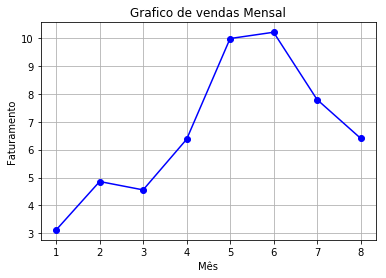

In [49]:
plt.plot(soma_mensal_df['mes_num'],soma_mensal_df['val_total_pre_venda_soma'], color='blue', marker='o', linestyle='solid')
plt.title("Grafico de vendas Mensal")
plt.ylabel("Faturamento")
plt.xlabel("Mês")
plt.grid(True)
plt.show()

In [53]:
#soma_mensal_df['val_total_pre_venda_soma'].value_counts()
#contagem_pedidos_cliente_df['seq_pre_venda_contagem'].value_counts()
contagem_pedidos_cliente_df

,nom_pessoa,seq_pre_venda_contagem
0,CLIENTE_1,2400
1,CLIENTE_100,1
2,CLIENTE_1000,2400
3,CLIENTE_1004,4
4,CLIENTE_1005,2
5,CLIENTE_1010,6
6,CLIENTE_1011,26
7,CLIENTE_1012,2
8,CLIENTE_1016,7
9,CLIENTE_1017,20
